In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import imblearn as ib
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import auc,roc_auc_score,roc_curve,precision_score,recall_score,f1_score

In [2]:
df = pd.read_csv("/content/stroke_resampled.csv")
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.000000,0,1,1,2,1,228.690000,36.600000,1,1
1,0,61.000000,0,0,1,3,0,202.210000,28.893237,2,1
2,1,80.000000,0,1,1,2,0,105.920000,32.500000,2,1
3,0,49.000000,0,0,1,2,1,171.230000,34.400000,3,1
4,0,79.000000,1,0,1,3,0,174.120000,24.000000,2,1
...,...,...,...,...,...,...,...,...,...,...,...
9717,0,79.871507,1,0,1,2,0,175.139663,30.536304,1,1
9718,0,70.908861,0,0,1,0,1,262.839699,38.754683,1,1
9719,1,80.000000,0,0,1,2,0,254.704872,30.844695,1,1
9720,0,74.953742,0,0,1,3,0,78.622369,29.175103,1,1


In [3]:
df_new = pd.read_csv("/content/Stroke Dataset.csv")
df_new

FileNotFoundError: [Errno 2] No such file or directory: '/content/Stroke Dataset.csv'

In [ ]:
df_new.shape

(5110, 12)

In [4]:
label_counts = df['stroke'].value_counts()
label_counts

,count
stroke,
1,4861
0,4861


In [5]:
df_new['stroke'].value_counts().plot(kind="bar",color = "green")

NameError: name 'df_new' is not defined

<Axes: xlabel='stroke'>

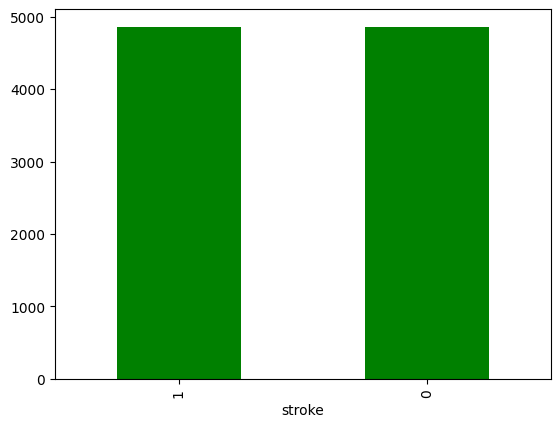

In [6]:
df['stroke'].value_counts().plot(kind="bar",color = "green")

In [7]:
df.shape

(9722, 11)

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


<Axes: >

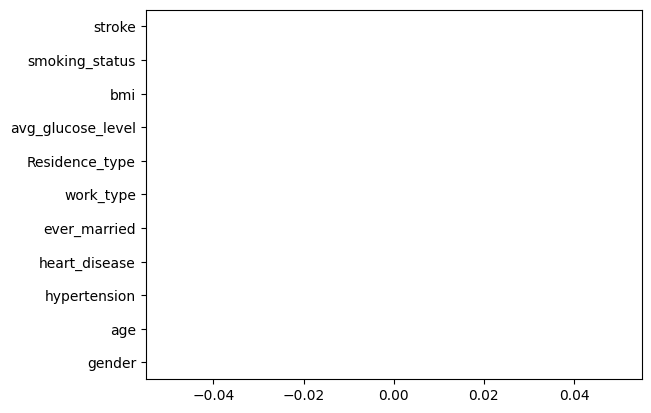

In [8]:
# Printing the number of N/A values in each column
print(df.isna().sum())
# Graphical representation of the na values present in the attribute - bar graph
df.isna().sum().plot.barh()

In [9]:
df.shape

(9722, 11)

In [10]:
df['gender'].value_counts()

,count
gender,
0,6560
1,3161
2,1


In [11]:
#removing the row containing gender = 'other'
df = df[df['gender'] != 2]

In [12]:
df['stroke'].value_counts()

,count
stroke,
1,4861
0,4860


In [13]:
df['gender'].value_counts()

,count
gender,
0,6560
1,3161


<Axes: xlabel='stroke'>

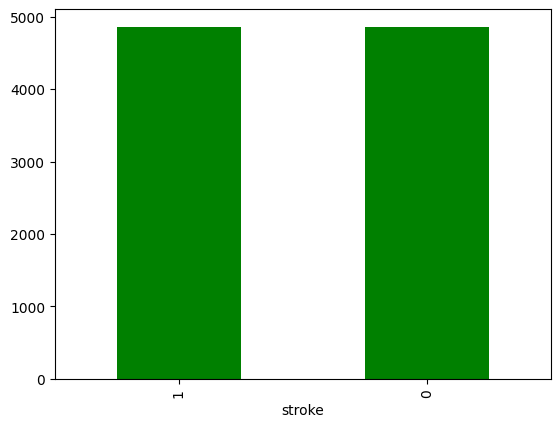

In [14]:
df['stroke'].value_counts().plot(kind="bar",color = "green")

In [15]:
X = df.drop('stroke', axis=1)
y = df['stroke']

In [16]:
'''education_order = {'Male': 0, 'Female': 1}
df['gender'] = df['gender'].map(education_order)'''

"education_order = {'Male': 0, 'Female': 1}\ndf['gender'] = df['gender'].map(education_order)"

In [17]:
'''education_order = {'Yes': 0.0, 'No': 1.0}
df['ever_married	'] = df['ever_married'].map(education_order)'''

"education_order = {'Yes': 0.0, 'No': 1.0}\ndf['ever_married\t'] = df['ever_married'].map(education_order)"

In [18]:
'''education_order = {'urban': 0, 'Rural': 1}
df['Residence_type'] = df['Residence_type'].map(education_order)'''

"education_order = {'urban': 0, 'Rural': 1}\ndf['Residence_type'] = df['Residence_type'].map(education_order)"

In [19]:
'''education_order = {'never smoked': 0, 'Unknown': 1, 'formerly smoked': 2, 'smokes': 3}
df['smoking_status'] = df['smoking_status'].map(education_order)'''

"education_order = {'never smoked': 0, 'Unknown': 1, 'formerly smoked': 2, 'smokes': 3}\ndf['smoking_status'] = df['smoking_status'].map(education_order)"

In [20]:
'''education_order = {'Private': 0, 'Self-employed': 1, 'children': 2, 'Govt_job': 3, 'Never_worked' : 4}
df['smoking_status'] = df['smoking_status'].map(education_order)'''

"education_order = {'Private': 0, 'Self-employed': 1, 'children': 2, 'Govt_job': 3, 'Never_worked' : 4}\ndf['smoking_status'] = df['smoking_status'].map(education_order)"

In [21]:
'''from sklearn.preprocessing import LabelEncoder

# Step 1: Clean column names
df.columns = df.columns.str.strip()

# Step 2: Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Step 3: Apply LabelEncoder to each categorical column
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col].astype(str))

print("Categorical columns encoded:", categorical_cols)
print(df.head())'''



'from sklearn.preprocessing import LabelEncoder\n\n# Step 1: Clean column names\ndf.columns = df.columns.str.strip()\n\n# Step 2: Identify categorical columns\ncategorical_cols = df.select_dtypes(include=[\'object\']).columns.tolist()\n\n# Step 3: Apply LabelEncoder to each categorical column\nle = LabelEncoder()\nfor col in categorical_cols:\n    df[col] = le.fit_transform(df[col].astype(str))\n\nprint("Categorical columns encoded:", categorical_cols)\nprint(df.head())'

In [22]:
# Make a copy to avoid modifying original
df_encoded = df.copy()

# Automatically detect all object or category columns
categorical_cols = df_encoded.select_dtypes(include=['object', 'category']).columns

# Apply LabelEncoder to each categorical column
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))  # Convert to string to avoid NaNs
    label_encoders[col] = le  # Save encoder if you want to inverse-transform later

# Done
print("Categorical columns encoded:", list(categorical_cols))
print(df_encoded.head())

Categorical columns encoded: []
   gender   age  hypertension  heart_disease  ever_married  work_type  \
0       1  67.0             0              1             1          2   
1       0  61.0             0              0             1          3   
2       1  80.0             0              1             1          2   
3       0  49.0             0              0             1          2   
4       0  79.0             1              0             1          3   

   Residence_type  avg_glucose_level        bmi  smoking_status  stroke  
0               1             228.69  36.600000               1       1  
1               0             202.21  28.893237               2       1  
2               0             105.92  32.500000               2       1  
3               1             171.23  34.400000               3       1  
4               0             174.12  24.000000               2       1  


In [23]:
df.head(20)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1
5,1,81.0,0,0,1,2,1,186.21,29.000000,1,1
6,1,74.0,1,1,1,2,0,70.09,27.400000,2,1
7,0,69.0,0,0,0,2,1,94.39,22.800000,2,1
8,0,59.0,0,0,1,2,0,76.15,28.893237,0,1
9,0,78.0,0,0,1,2,1,58.57,24.200000,0,1


In [24]:
df_encoded.head(20)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1
5,1,81.0,0,0,1,2,1,186.21,29.000000,1,1
6,1,74.0,1,1,1,2,0,70.09,27.400000,2,1
7,0,69.0,0,0,0,2,1,94.39,22.800000,2,1
8,0,59.0,0,0,1,2,0,76.15,28.893237,0,1
9,0,78.0,0,0,1,2,1,58.57,24.200000,0,1


In [25]:
'''# Applied SMOTE
X = df.drop('stroke', axis=1)
y = df['stroke']

print("Before SMOTE:", Counter(y))
smote = SMOTE(sampling_strategy='minority' , random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# modifying original dataframe
df = pd.DataFrame(X_resampled, columns=X.columns)
df['stroke'] = y_resampled

print("After SMOTE:", Counter(y_resampled))'''

'# Applied SMOTE\nX = df.drop(\'stroke\', axis=1)\ny = df[\'stroke\']\n\nprint("Before SMOTE:", Counter(y))\nsmote = SMOTE(sampling_strategy=\'minority\' , random_state=42)\nX_resampled, y_resampled = smote.fit_resample(X, y)\n\n# modifying original dataframe\ndf = pd.DataFrame(X_resampled, columns=X.columns)\ndf[\'stroke\'] = y_resampled\n\nprint("After SMOTE:", Counter(y_resampled))'

In [26]:
df.shape

(9721, 11)

In [27]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.000000,0,1,1,2,1,228.690000,36.600000,1,1
1,0,61.000000,0,0,1,3,0,202.210000,28.893237,2,1
2,1,80.000000,0,1,1,2,0,105.920000,32.500000,2,1
3,0,49.000000,0,0,1,2,1,171.230000,34.400000,3,1
4,0,79.000000,1,0,1,3,0,174.120000,24.000000,2,1
...,...,...,...,...,...,...,...,...,...,...,...
9717,0,79.871507,1,0,1,2,0,175.139663,30.536304,1,1
9718,0,70.908861,0,0,1,0,1,262.839699,38.754683,1,1
9719,1,80.000000,0,0,1,2,0,254.704872,30.844695,1,1
9720,0,74.953742,0,0,1,3,0,78.622369,29.175103,1,1


In [28]:
'''x_train, x_val, y_train, y_val = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)'''
# Split 85% into train+val, and 15% for test
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# From the remaining 85%, take ~17.6% as val (which becomes ~15% of original)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, stratify=y_temp, random_state=42)

# Confirm proportions
print(f"Train: {len(X_train)}")
print(f"Validation: {len(X_val)}")
print(f"Test: {len(X_test)}")

Train: 5832
Validation: 1944
Test: 1945


In [29]:
# Checking the size of the splits
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)
print('x_val:', X_val.shape)
print('y_val:', y_val.shape)

X_train: (5832, 10)
y_train: (5832,)
X_test: (1945, 10)
y_test: (1945,)
x_val: (1944, 10)
y_val: (1944,)


In [30]:
#  <-----Decision Tree------>
Dtree = DecisionTreeClassifier(random_state=42)
Dtree.fit(X_train, y_train)

# Predict on validation set
y_pred_val = Dtree.predict(X_val)
y_pred_test = Dtree.predict(X_test)
# Evaluate on validation set
print("Accuracy on Validation Set:", metrics.accuracy_score(y_val, y_pred_val))
print("Accuracy on Test Set:", metrics.accuracy_score(y_test, y_pred_test))
print("\nConfusion Matrix -> Validation:")
print(metrics.confusion_matrix(y_val, y_pred_val))
print("\nConfusion Matrix -> Test:")
print(metrics.confusion_matrix(y_test, y_pred_test))
print("\nClassification Report:")
print(metrics.classification_report(y_val, y_pred_val))

Accuracy on Validation Set: 0.897633744855967
Accuracy on Test Set: 0.897172236503856

Confusion Matrix -> Validation:
[[844 128]
 [ 71 901]]

Confusion Matrix -> Test:
[[851 121]
 [ 79 894]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.87      0.89       972
           1       0.88      0.93      0.90       972

    accuracy                           0.90      1944
   macro avg       0.90      0.90      0.90      1944
weighted avg       0.90      0.90      0.90      1944



In [31]:
print(X_val.shape)
print(y_val.shape)

(1944, 10)
(1944,)


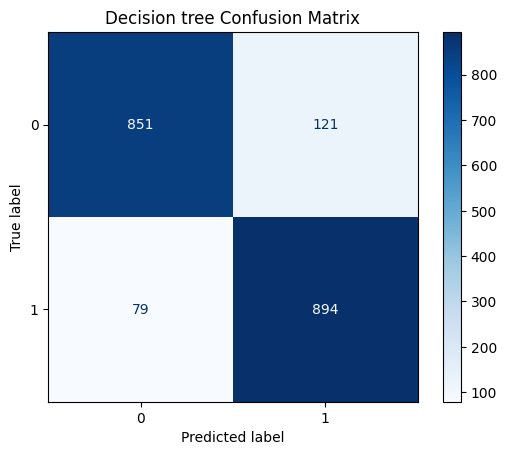

In [32]:
ConfusionMatrixDisplay.from_estimator(Dtree, X_test, y_test, cmap='Blues')
plt.title("Decision tree Confusion Matrix")
plt.grid(False)
plt.show()

In [33]:
df['work_type'].value_counts()

,count
work_type,
2,6128
3,1216
0,1193
4,690
1,494


In [34]:
df.head(5110)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.000000,0,1,1,2,1,228.690000,36.600000,1,1
1,0,61.000000,0,0,1,3,0,202.210000,28.893237,2,1
2,1,80.000000,0,1,1,2,0,105.920000,32.500000,2,1
3,0,49.000000,0,0,1,2,1,171.230000,34.400000,3,1
4,0,79.000000,1,0,1,3,0,174.120000,24.000000,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5106,0,81.000000,0,0,1,3,1,125.200000,40.000000,2,0
5107,0,35.000000,0,0,1,3,0,82.990000,30.600000,2,0
5108,1,51.000000,0,0,1,2,0,166.290000,25.600000,1,0
5109,0,44.000000,0,0,1,0,1,85.280000,26.200000,0,0


In [35]:
'''scaler = StandardScaler()
x_train = scaler.fit_transform(X_train)
x_test = scaler.transform(X_test)'''

'scaler = StandardScaler()\nx_train = scaler.fit_transform(X_train)\nx_test = scaler.transform(X_test)'

In [36]:
input = {
    "gender" : 1,
    "age" : 67.0,
    "hypertension" : 0,
    "heart_disease" : 1,
    "ever_married	" : 1,
    "work_type" : 2,
    "Residence_type" : 1,
    "avg_glucose_level" : 228.69,
    "bmi" : 36.6,
    "smoking_status" : 1
}

# Convert dictionary to array
signal_array = np.array(list(input.values())).reshape(1, -1)

# Standard scaler must be same one used during training
# Assuming you already fit a StandardScaler on X_train earlier:
scaler = StandardScaler().fit(X_train)
custom_signal_scaled = scaler.transform(signal_array)

# Predict using XGBoost
prediction_Dtree = Dtree.predict(signal_array)                  # Returns class label (0 or 1)
confidence_score = Dtree.predict_proba(signal_array)[0][1]   # Probability of class 1

# Output
print(f"DECISION TREE Predicted Class: {prediction_Dtree[0]}")
print(f"Confidence Score for class 1 (Seizure): {confidence_score:.4f}")

DECISION TREE Predicted Class: 1
Confidence Score for class 1 (Seizure): 1.0000


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [37]:
#  <-----------------XGBoost------------------->
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)

# Predict
y_pred_xgb = xgb.predict(X_val)

# Evaluation
acc_xgb_val = accuracy_score(y_val, y_pred_xgb)
acc_xgb_test = accuracy_score(y_test, xgb.predict(X_test))
print(f"XGBoost validation Accuracy: {acc_xgb_val:.4f}")
print(f"XGBoost Test Accuracy: {acc_xgb_test:.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_val, y_pred_xgb))
print("\nClassification Report:")
print(classification_report(y_val, y_pred_xgb))

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:41:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost validation Accuracy: 0.9414
XGBoost Test Accuracy: 0.9409

Confusion Matrix:
[[901  71]
 [ 43 929]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       972
           1       0.93      0.96      0.94       972

    accuracy                           0.94      1944
   macro avg       0.94      0.94      0.94      1944
weighted avg       0.94      0.94      0.94      1944



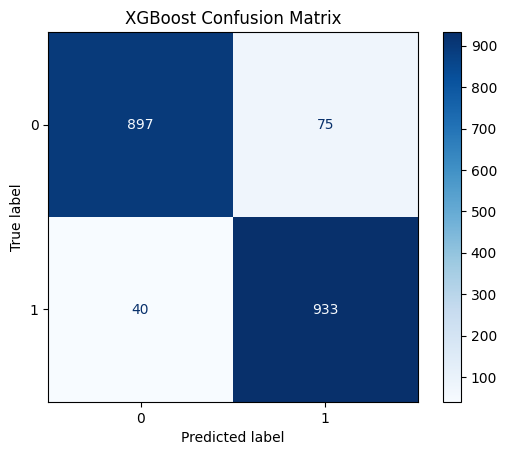

In [38]:
ConfusionMatrixDisplay.from_estimator(xgb, X_test, y_test, cmap='Blues')
plt.title("XGBoost Confusion Matrix")
plt.grid(False)
plt.show()

In [39]:
# <--------------------------------XGBOOST Test case------------------------------>
input = {
    "gender" : 0,
    "age" : 61.0,
    "hypertension" : 0,
    "heart_disease" : 0,
    "ever_married	" : 1,
    "work_type" : 3,
    "Residence_type" : 0,
    "avg_glucose_level" : 202.21,
    "bmi" : 28.893237,
    "smoking_status" : 2
}

# Convert dictionary to array
signal_array = np.array(list(input.values())).reshape(1, -1)

# Standard scaler must be same one used during training
# Assuming you already fit a StandardScaler on X_train earlier:
scaler = StandardScaler().fit(X_train)
custom_signal_scaled = scaler.transform(signal_array)

# Predict using XGBoost
prediction_xgb = xgb.predict(signal_array)                  # Returns class label (0 or 1)
confidence_score = xgb.predict_proba(signal_array)[0][1]   # Probability of class 1

# Output
print(f"xgbOOST Predicted Class: {prediction_xgb[0]}")
print(f"Confidence Score for class 1 (Seizure): {confidence_score:.4f}")

xgbOOST Predicted Class: 0
Confidence Score for class 1 (Seizure): 0.4787


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [40]:
y_test.shape

(1945,)

In [41]:
# <-------------------------------RANDOMFOREST--------------------------------->
RNDM = RandomForestClassifier(random_state=42)
RNDM.fit(X_train, y_train)

# Predict
y_pred_RNDM = RNDM.predict(X_val)
y_pred_RNDM_test = RNDM.predict(X_test)

# Evaluation
acc_RNDM = accuracy_score(y_val, y_pred_RNDM)
acc_RNDM_test = accuracy_score(y_test, y_pred_RNDM_test)
print(f"Random Forest Accuracy: {acc_RNDM:.4f}")
print(f"Random Forest Test Accuracy: {acc_RNDM_test:.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_val, y_pred_RNDM))
print("\nClassification Report:")
print(classification_report(y_val, y_pred_RNDM))
print("\nConfusion Matrix(test):")
print(confusion_matrix(y_test, y_pred_RNDM_test))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_RNDM_test))

Random Forest Accuracy: 0.9326
Random Forest Test Accuracy: 0.9347

Confusion Matrix:
[[884  88]
 [ 43 929]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.91      0.93       972
           1       0.91      0.96      0.93       972

    accuracy                           0.93      1944
   macro avg       0.93      0.93      0.93      1944
weighted avg       0.93      0.93      0.93      1944


Confusion Matrix(test):
[[885  87]
 [ 40 933]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.91      0.93       972
           1       0.91      0.96      0.94       973

    accuracy                           0.93      1945
   macro avg       0.94      0.93      0.93      1945
weighted avg       0.94      0.93      0.93      1945



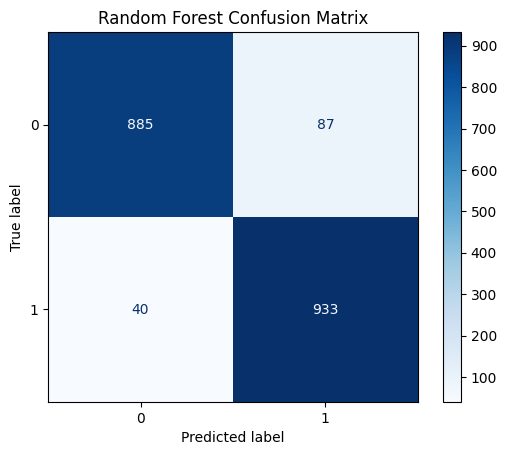

In [42]:
ConfusionMatrixDisplay.from_estimator(RNDM, X_test, y_test, cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.grid(False)
plt.show()

In [43]:
'''input = {
    "id" : 9046	,
    "gender" : 1,
    "age" : 67.0,
    "hypertension" : 0,
    "heart_disease" : 1,
    "ever_married	" : 1,
    "work_type" : 2,
    "Residence_type" : 1,
    "avg_glucose_level" : 228.69,
    "bmi" : 36.6,
    "smoking_status" : 1
}

# Convert dictionary to array
signal_array = np.array(list(input.values())).reshape(1, -1)

# Standard scaler must be same one used during training
# Assuming you already fit a StandardScaler on X_train earlier:
# scaler = StandardScaler().fit(X_train)
custom_signal_scaled = scaler.transform(signal_array)

# Predict using XGBoost
prediction_RNDM = RNDM.predict(signal_array)                  # Returns class label (0 or 1)
confidence_score = RNDM.predict_proba(signal_array)[0][1]   # Probability of class 1

# Output
print(f"RANDOM FOREST Predicted Class: {prediction_RNDM[0]}")
print(f"Confidence Score for class 1 (Seizure): {confidence_score:.4f}")'''

from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
smote = SMOTE(random_state=42)

for fold, (train_idx, val_idx) in enumerate(skf.split(X, y)):
    print(f"\nFold {fold + 1}")

    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

    # ✅ Apply SMOTE only to the training set
    X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

    # Optional: Add class_weight='balanced'
    model = RandomForestClassifier(class_weight='balanced', random_state=42)
    model.fit(X_train_sm, y_train_sm)

    y_pred = model.predict(X_val)

    print(classification_report(y_val, y_pred, zero_division=0))
    print(confusion_matrix(y_val, y_pred))


Fold 1
              precision    recall  f1-score   support

           0       0.96      0.93      0.95       972
           1       0.93      0.96      0.95       973

    accuracy                           0.95      1945
   macro avg       0.95      0.95      0.95      1945
weighted avg       0.95      0.95      0.95      1945

[[904  68]
 [ 37 936]]

Fold 2
              precision    recall  f1-score   support

           0       0.96      0.93      0.94       972
           1       0.93      0.96      0.94       972

    accuracy                           0.94      1944
   macro avg       0.94      0.94      0.94      1944
weighted avg       0.94      0.94      0.94      1944

[[900  72]
 [ 39 933]]

Fold 3
              precision    recall  f1-score   support

           0       0.95      0.92      0.94       972
           1       0.93      0.95      0.94       972

    accuracy                           0.94      1944
   macro avg       0.94      0.94      0.94      1944
weig

In [44]:
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_test shape: (1945, 10)
y_test shape: (1945,)


In [45]:
# <-----------------------------------CUSTOM MODEL----------------------------------------->



from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Early stopping and learning rate reduction
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=3, verbose=1)

# Enhanced Model Architecture
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],),
          kernel_regularizer=regularizers.l2(0.001)),
    BatchNormalization(),
    Dropout(0.4),

    Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(32, activation='relu'),
    Dropout(0.2),

    Dense(1, activation='sigmoid')
])

# Compile
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train
history = model.fit(X_train, y_train,
                    validation_split=0.2,
                    epochs=50,
                    batch_size=64,
                    callbacks=[early_stop, reduce_lr],
                    verbose=1)

# Evaluate
test_loss, test_acc = model.evaluate(X_val, y_val, verbose=1)

print("✅ Final Test Accuracy:", round(test_acc * 100, 2), "%")
print("📉 Final Test Loss:", round(test_loss, 4))

# Save the model
model.save("enhanced_stroke_prediction_model.h5")
print("💾 Model saved as 'enhanced_stroke_prediction_model.h5'")

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.6526 - loss: 0.9653 - val_accuracy: 0.9749 - val_loss: 0.3321 - learning_rate: 0.0010
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7318 - loss: 0.7323 - val_accuracy: 0.8239 - val_loss: 0.6193 - learning_rate: 0.0010
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7540 - loss: 0.6850 - val_accuracy: 0.7551 - val_loss: 0.7508 - learning_rate: 0.0010
Epoch 4/50
97/98 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7423 - loss: 0.6821
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7424 - loss: 0.6817 - val_accuracy: 0.7031 - val_loss: 0.8441 - learning_rate: 0.0010
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7696 - loss: 0.6397 - val_accuracy: 0.6973 - val_loss: 0.8645 - learning_rate: 3.0000e-04
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7729 - loss: 0.6454 - val_accuracy: 0.7185 -

✅ Final Test Accuracy: 71.6 %
📉 Final Test Loss: 0.9023
💾 Model saved as 'enhanced_stroke_prediction_model.h5'


In [46]:
#importing the KNN Classifier module
from sklearn.neighbors import KNeighborsClassifier
# Libraries for calculating performance metrics
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.metrics import auc,roc_auc_score,roc_curve,precision_score,recall_score,f1_score

# Create the classifier object
# 2 neighbours because of the 2 classes
knn = KNeighborsClassifier(n_neighbors = 2)
# Training the classifier
knn.fit(X_train,y_train)
#predicting result using the test dataset
y_pred_knn = knn.predict(X_val)
y_pred_prob_knn = knn.predict_proba(X_val)[:, 1]
y_pred_knn_test = knn.predict(X_test)

# Printing the accuracy and roc-auc score of the model
confusion_matrix(y_val, y_pred_knn)
print('validation Accuracy:',accuracy_score(y_val, y_pred_knn))
print('Test Accuracy:', accuracy_score(y_test, y_pred_knn_test))
print('ROC AUC Score:', roc_auc_score(y_val, y_pred_prob_knn))

validation Accuracy: 0.926954732510288
Test Accuracy: 0.9768637532133676
ROC AUC Score: 0.9425837016714931


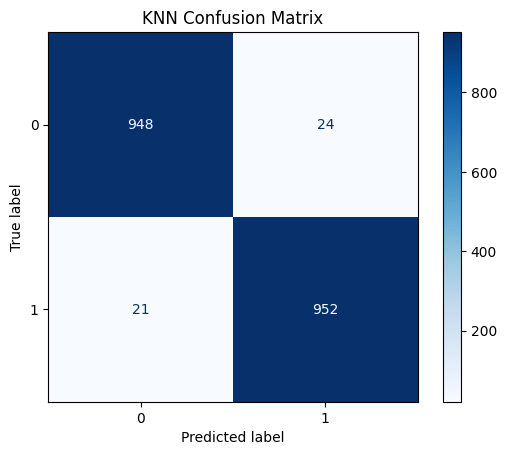

In [47]:
ConfusionMatrixDisplay.from_estimator(knn, X_test, y_test, cmap='Blues')
plt.title("KNN Confusion Matrix")
plt.grid(False)
plt.show()

In [57]:
# importing random forest classifier module for training
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# Create the classifier object
rf_clf = RandomForestClassifier(n_estimators = 100)

# Train the model using the training sets
rf_clf.fit(X_train, y_train)

# performing predictions on the test dataset
y_pred_rf = rf_clf.predict(X_val)
y_pred_rf_test = rf_clf.predict(X_test)
# Printing accuracy of the model
print('Accuracy:', accuracy_score(y_val, y_pred_rf))
print('Accuracy(test):', accuracy_score(y_test, y_pred_rf_test))
print('ROC AUC Score:', roc_auc_score(y_val, rf_clf.predict_proba(X_val)[:, 1]))
#print('ROC AUC Score(Test):', roc_auc_score(y_test, rf_clf.predict_proba(X_val)[:, 1]))

Accuracy: 0.9506172839506173
Accuracy(test): 0.9886889460154241
ROC AUC Score: 0.9913710435401107


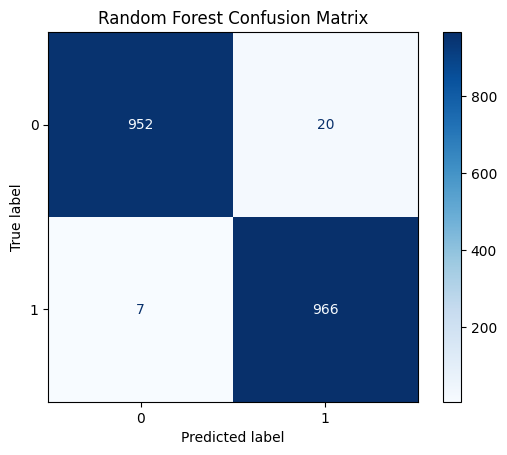

In [49]:
ConfusionMatrixDisplay.from_estimator(rf_clf, X_test, y_test, cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.grid(False)
plt.show()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


<Axes: >

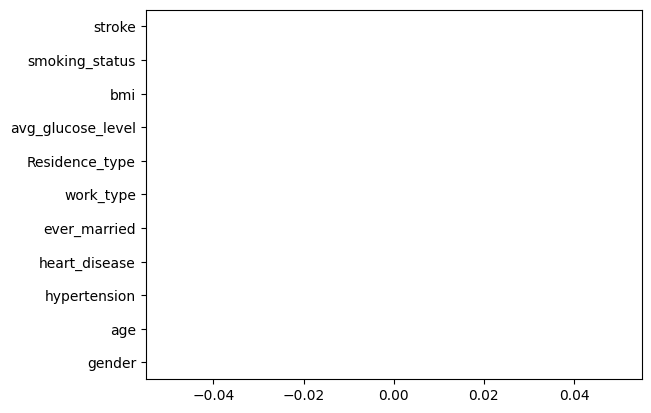

In [50]:
# Printing the number of N/A values in each column
print(df.isna().sum())
# Graphical representation of the na values present in the attribute - bar graph
df.isna().sum().plot.barh()

61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


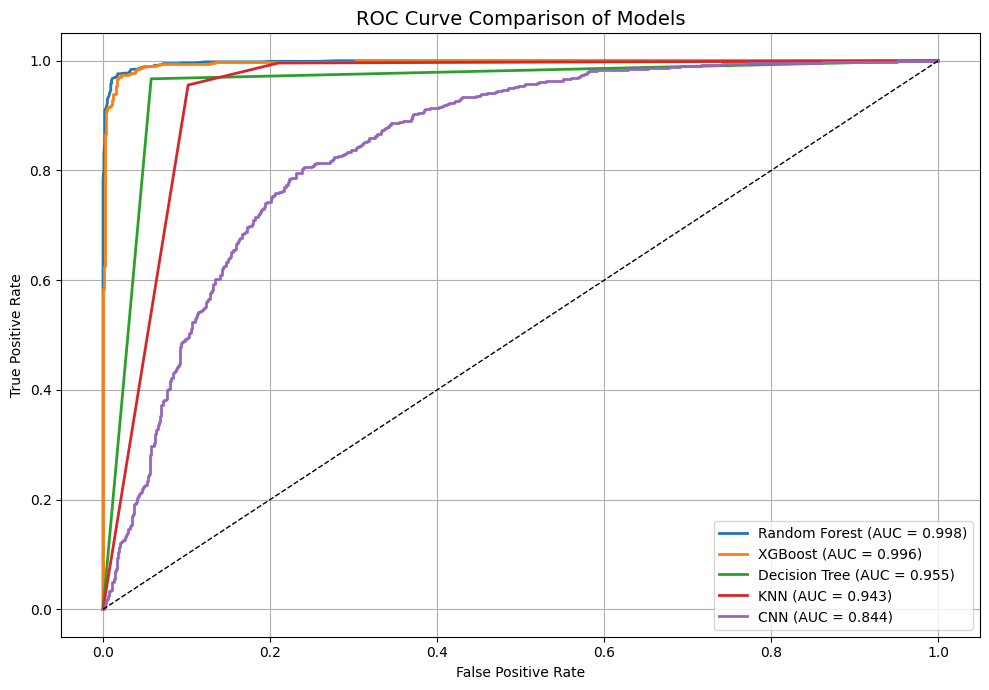

In [51]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Dictionary of models and their predicted probabilities (for class 1)
# Replace or add more models as per your use
model_predictions = {
    'Random Forest': RNDM.predict_proba(X_val)[:, 1],
    'XGBoost': xgb.predict_proba(X_val)[:, 1],
    'Decision Tree': Dtree.predict_proba(X_val)[:, 1],
    'KNN': knn.predict_proba(X_val)[:, 1],
    "CNN" : model.predict(X_val).ravel()
    # 'Neural Net': model.predict(x_val).ravel(),  # if using Keras
}

# Plotting
plt.figure(figsize=(10, 7))

for name, probs in model_predictions.items():
    fpr, tpr, _ = roc_curve(y_val, probs)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.3f})')

# Diagonal line (no-skill classifier)
plt.plot([0, 1], [0, 1], color='black', lw=1, linestyle='--')

plt.title('ROC Curve Comparison of Models', fontsize=14)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

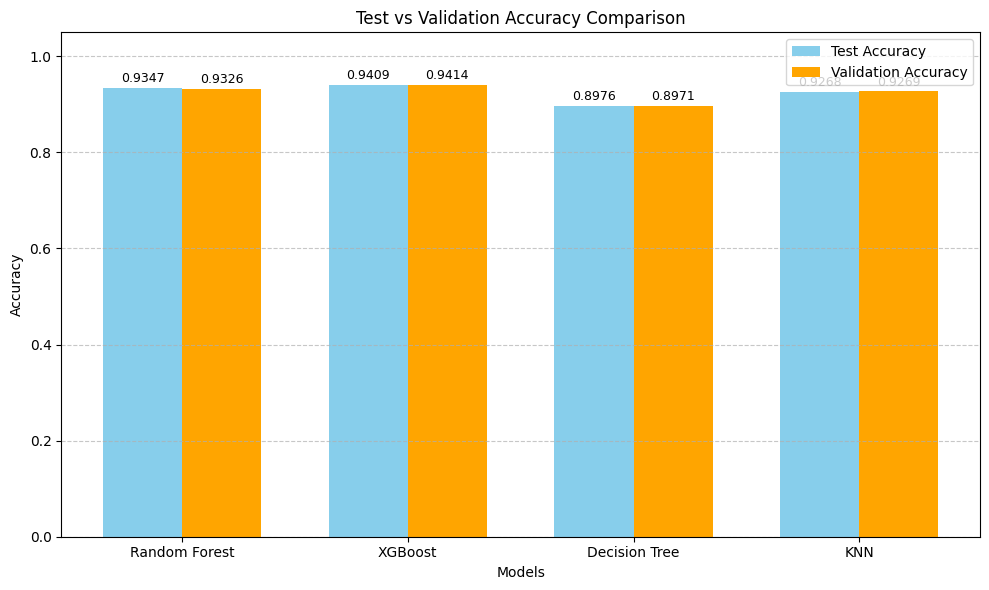

In [58]:
import matplotlib.pyplot as plt
import numpy as np

# Actual model accuracies
model_names = ['Random Forest', 'XGBoost', 'Decision Tree', 'KNN']
val_accuracies = [0.9326, 0.9414, 0.8971, 0.9269]
test_accuracies = [0.9347, 0.9409, 0.8976, 0.9268]

x = np.arange(len(model_names))
width = 0.35

plt.figure(figsize=(10, 6))
bars1 = plt.bar(x - width/2, test_accuracies, width, label='Test Accuracy', color='skyblue')
bars2 = plt.bar(x + width/2, val_accuracies, width, label='Validation Accuracy', color='orange')

# Show exact values
for bar in bars1 + bars2:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.005, str(height),
             ha='center', va='bottom', fontsize=9)

plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Test vs Validation Accuracy Comparison')
plt.xticks(x, model_names)
plt.ylim(0, 1.05)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



In [53]:
import pandas as pd
import numpy as np
from sklearn.utils import shuffle

# Step 1: Load your dataset
df = pd.read_csv('stroke_resampled.csv')

# Step 2: Clean column names
df.columns = df.columns.str.strip()

# Step 3: Split into minority and majority
minority_class = df[df['stroke'] == 1]
majority_class = df[df['stroke'] == 0]

print(f"Before balancing:\nMinority: {len(minority_class)}, Majority: {len(majority_class)}")

# Step 4: Define how many synthetic samples you need
n_to_generate = len(majority_class) - len(minority_class)

# Step 5: Generate synthetic samples (copy + noise)
synthetic_minority = minority_class.sample(n=n_to_generate, replace=True).copy()

# Add small noise to numerical features to avoid perfect duplication
numeric_cols = synthetic_minority.select_dtypes(include=[np.number]).columns.drop('stroke')

for col in numeric_cols:
    noise = np.random.normal(0, 0.01, size=len(synthetic_minority))
    synthetic_minority[col] += noise

# Step 6: Combine and shuffle
df_balanced = pd.concat([majority_class, minority_class, synthetic_minority])
df_balanced = shuffle(df_balanced, random_state=42).reset_index(drop=True)

# Step 7: Save the balanced dataset
df_balanced.to_csv('stroke_balanced_custom.csv', index=False)

# Step 8: Final counts
print(f"After balancing:\n{df_balanced['stroke'].value_counts()}")
print("Balanced dataset saved as 'stroke_balanced_custom.csv'")


Before balancing:
Minority: 4861, Majority: 4861
After balancing:
stroke
0    4861
1    4861
Name: count, dtype: int64
Balanced dataset saved as 'stroke_balanced_custom.csv'
